In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
def f(x,i):
    return x * a[i] + b[i]
    

In [186]:

"""control factor of total number of lines!!"""
ss = 30
l_lim = -20
h_lim = 20

x = np.linspace(l_lim,h_lim,800)
y = np.ones((ss,800))


f_y = np.ones([ss,800])
f_y.size

24000

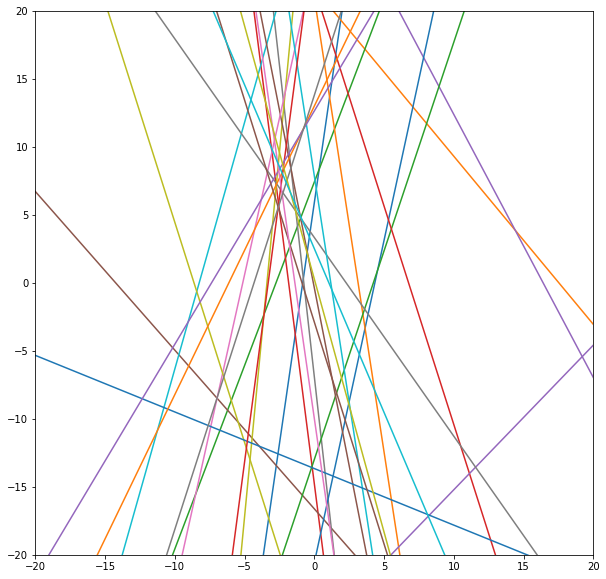

In [195]:
a = np.random.randn(ss,1) * 5
b =  np.random.randn(ss,1) * 20

for i in range(ss):
    f_y[i] = x
f_y = x * a + b


"""control total number of lines;;"""
k = ss

plt.figure(figsize=(10,10))
for i in range(k):
    plt.plot(x, f_y[i])
plt.ylim([l_lim,h_lim])
plt.xlim([l_lim,h_lim])
plt.show()

In [196]:
%%time

%time
xx, yy = np.meshgrid(x,x)
sol = np.zeros((800,800))
sol.size

for i in range(800):
    for j in range(800):
        sol[i][j] = (  (np.abs(a)/np.sqrt(a*a+1))  *  np.abs(xx[i,j]-((yy[i,j]/a)-b/a ))  ).sum()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.62 µs
CPU times: user 9.17 s, sys: 28.8 ms, total: 9.19 s
Wall time: 9.25 s


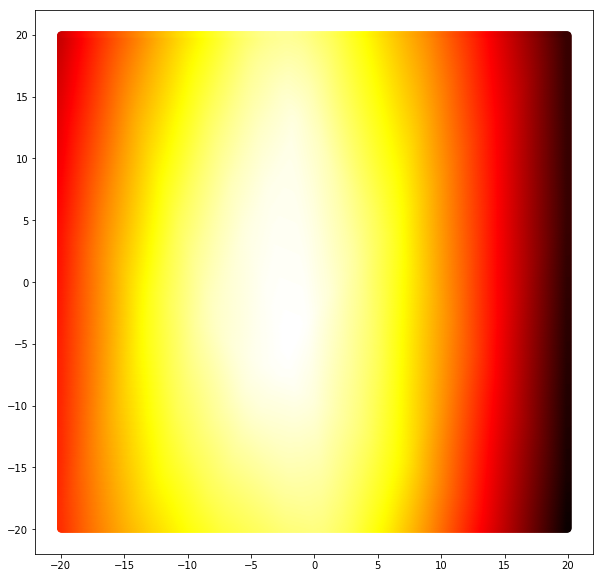

CPU times: user 21.8 s, sys: 321 ms, total: 22.1 s
Wall time: 22 s


In [185]:
%%time

cs = sol.argmin()//800

plt.figure(figsize=(10,10))
plt.scatter(xx,yy,c=sol,cmap="hot_r")
plt.show()